In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# humidity 시각화

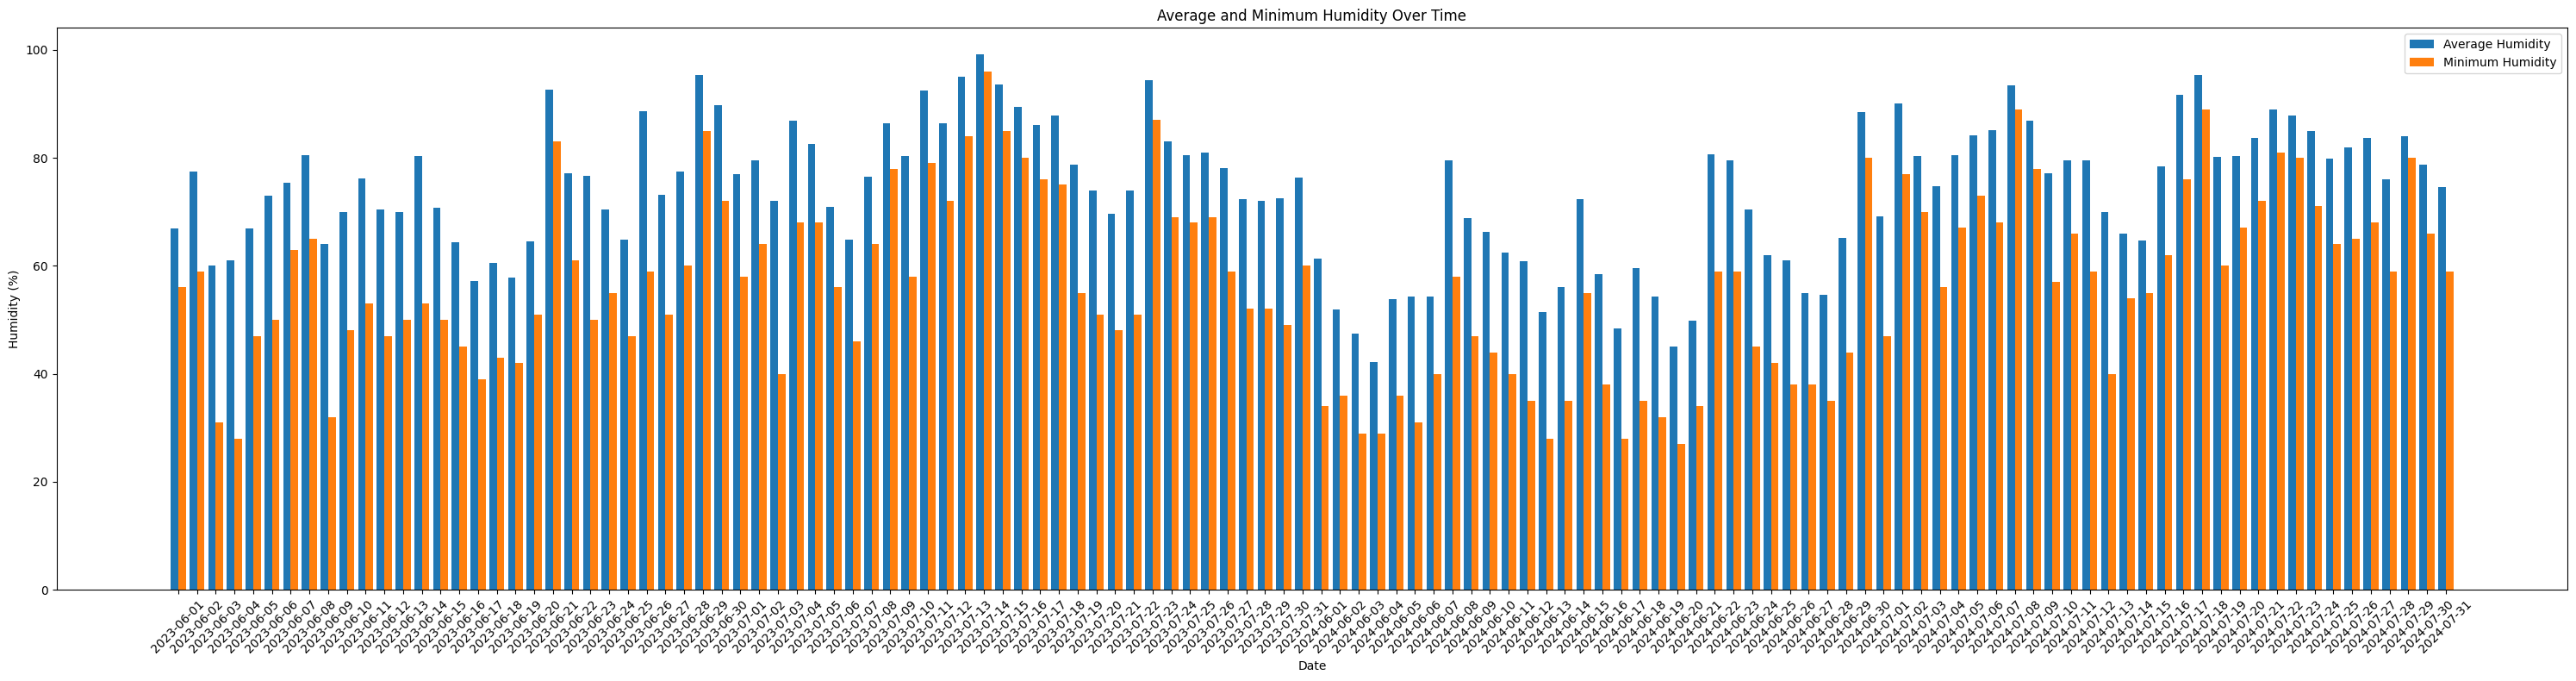

In [ ]:
humidity_data = pd.read_csv("humidity.csv")

plt.figure(figsize=(30, 8))
bar_width = 0.4
humidity_data['Date'] = pd.to_datetime(humidity_data['Date'])
dates = humidity_data['Date']

# Creating bar positions for dual bar plot
bar_positions_avg = np.arange(len(dates))
bar_positions_min = bar_positions_avg + bar_width

# Plotting the bar charts
plt.bar(bar_positions_avg, humidity_data['AverageHumidity'], width=bar_width, label='Average Humidity')
plt.bar(bar_positions_min, humidity_data['MinimumHumidity'], width=bar_width, label='Minimum Humidity')

# 표에 레이블 추가
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Average and Minimum Humidity Over Time')
plt.xticks(bar_positions_avg + bar_width / 2, dates.dt.strftime('%Y-%m-%d'), rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


# temp온도 시각화

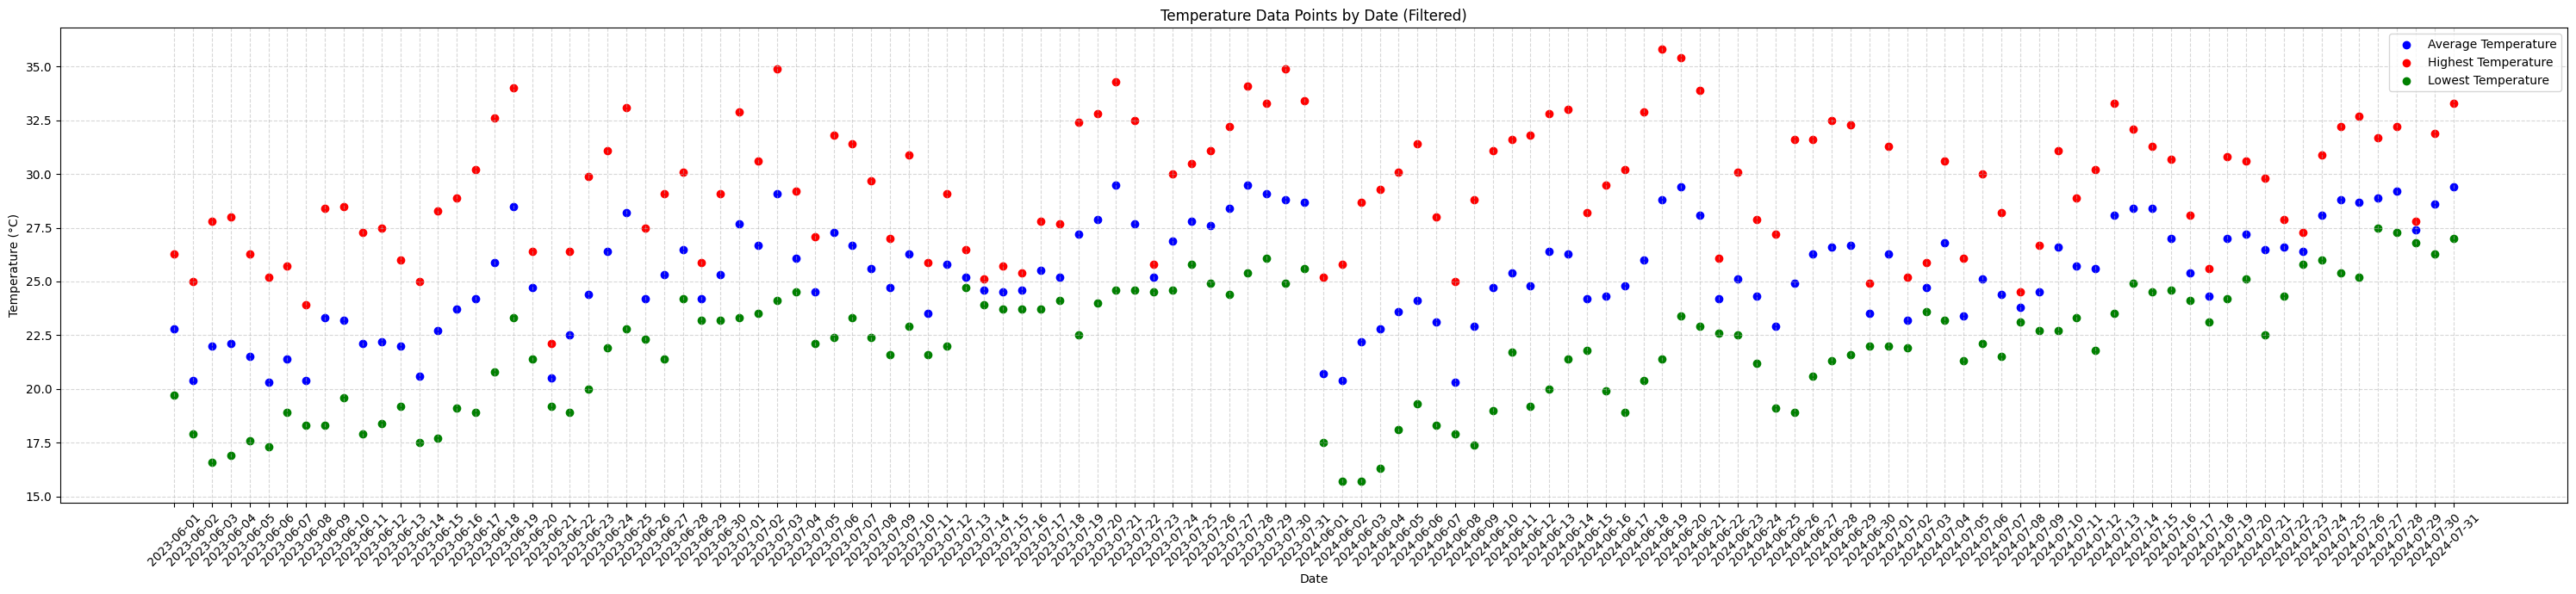

In [81]:
temp_data = pd.read_csv("temp.csv")
temp_data['Date'] = pd.to_datetime(temp_data['Date'])
dots = range(len(temp_data['Date']))

# Plotting with only dates present in the data
plt.figure(figsize=(30, 7))
plt.scatter(dots, temp_data['AvgTemp'], label='Average Temperature', color='blue')
plt.scatter(dots, temp_data['MaxTemp'], label='Highest Temperature', color='red')
plt.scatter(dots, temp_data['MinTemp'], label='Lowest Temperature', color='green')



plt.title('Temperature Data Points by Date (Filtered)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Limit x-axis to only the unique dates present in the data
plt.xticks(dots, dates.dt.strftime('%Y-%m-%d'), rotation=45)

plt.tight_layout()
plt.show()


# 일조일사 데이터 시각화

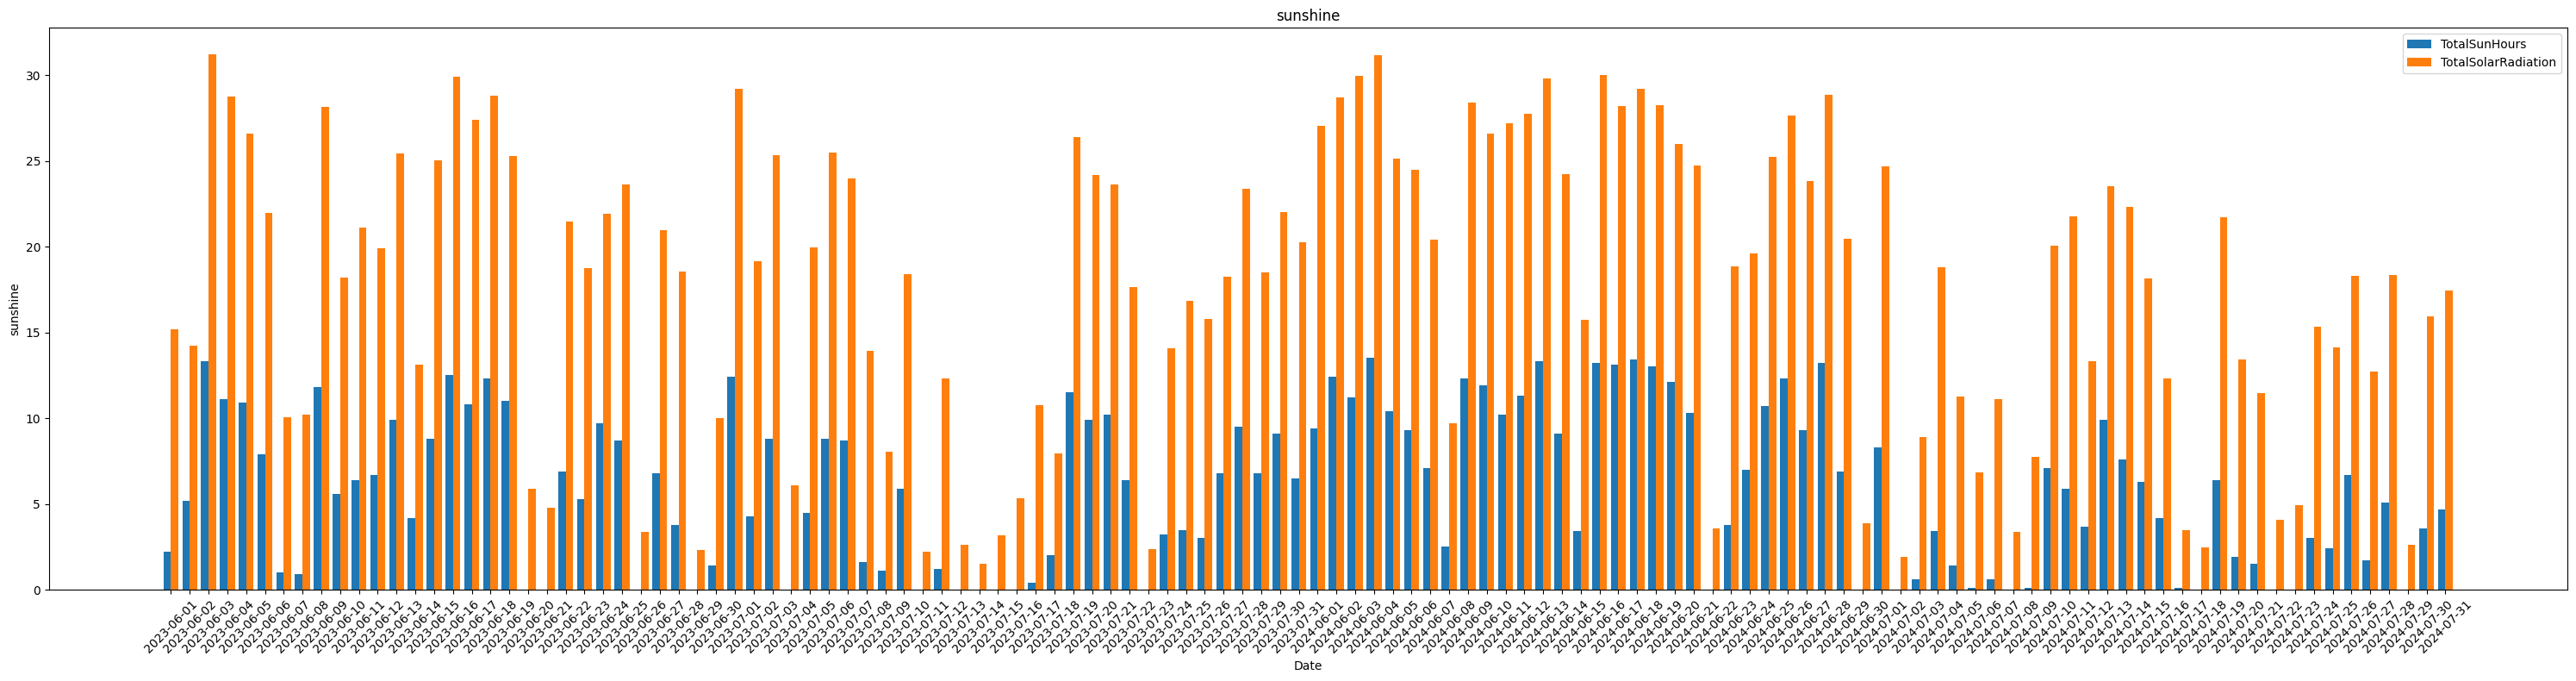

In [82]:
sunshine_data = pd.read_csv("sunshine.csv")

plt.figure(figsize=(30, 8))
bar_width = 0.4
sunshine_data['Date'] = pd.to_datetime(sunshine_data['Date'])
dates = sunshine_data['Date']

# Creating bar positions for dual bar plot
bar_positions_sunhours = np.arange(len(dates))
bar_positions_solarradiation = bar_positions_avg + bar_width

# Plotting the bar charts
plt.bar(bar_positions_sunhours, sunshine_data['TotalSunHours'], width=bar_width, label='TotalSunHours')
plt.bar(bar_positions_solarradiation, sunshine_data['TotalSolarRadiation'], width=bar_width, label='TotalSolarRadiation')

# Adding labels and titles
plt.xlabel('Date')
plt.ylabel('sunshine')
plt.title('sunshine')
plt.xticks(bar_positions_sunhours + bar_width / 2, dates.dt.strftime('%Y-%m-%d'), rotation=45)
plt.legend()
plt.tight_layout()

# Displaying the plot
plt.show()


# 데이터 한 테이블에 합치기

In [83]:
humidity_df = pd.read_csv('humidity.csv')
sunshine_df = pd.read_csv('sunshine.csv')
temp_df = pd.read_csv('temp.csv')

merged_df = pd.merge(humidity_df, sunshine_df, on="Date", how="outer")
merged_df = pd.merge(merged_df, temp_df, on="Date", how="outer")

# 필요없는 행 지우기
merged_df = merged_df.drop(columns=['BranchNum_x', 'BranchName_x','BranchNum_y', 'BranchName_y','BranchNum', 'BranchName'])

print(merged_df.head())

# 파일로 저장
merged_df.to_csv('merged_dataset.csv', index=False)

         Date  AverageHumidity  MinimumHumidity  TotalSunHours  \
0  2023-06-01             66.9             56.0            2.2   
1  2023-06-02             77.4             59.0            5.2   
2  2023-06-03             60.1             31.0           13.3   
3  2023-06-04             61.0             28.0           11.1   
4  2023-06-05             66.9             47.0           10.9   

   SunshineDurationRate  TotalSolarRadiation  AvgTemp  MaxTemp MaxTempTime  \
0                  15.1                15.18     22.8     26.3       17:07   
1                  35.6                14.24     20.4     25.0       16:48   
2                  91.1                31.19     22.0     27.8       14:23   
3                  76.0                28.74     22.1     28.0       16:27   
4                  74.7                26.60     21.5     26.3       15:32   

   MinTemp MinTempTime  TempRange  
0     19.7       05:28        6.6  
1     17.9       06:01        7.1  
2     16.6       06:07    

# 3차원에 데이터 시각화
merged_df 데이터에서부터 x축에는 AverageHumidity y축에는 TotalSolarRadiation z축에는 AvgTemp를 삽입해 시각화 

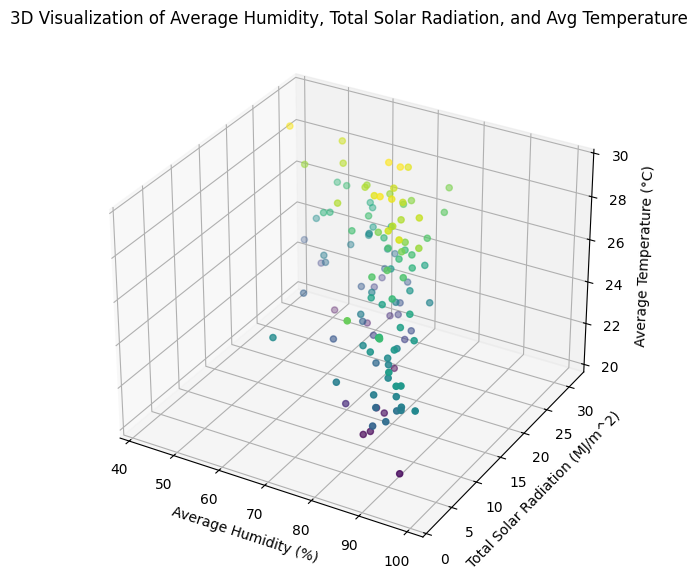

In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = merged_df['AverageHumidity']
y = merged_df['TotalSolarRadiation']
z = merged_df['AvgTemp']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Labels and title
ax.set_xlabel('Average Humidity (%)')
ax.set_ylabel('Total Solar Radiation (MJ/m^2)')
ax.set_zlabel('Average Temperature (°C)')
ax.set_title('3D Visualization of Average Humidity, Total Solar Radiation, and Avg Temperature')

# Display the plot
plt.show()


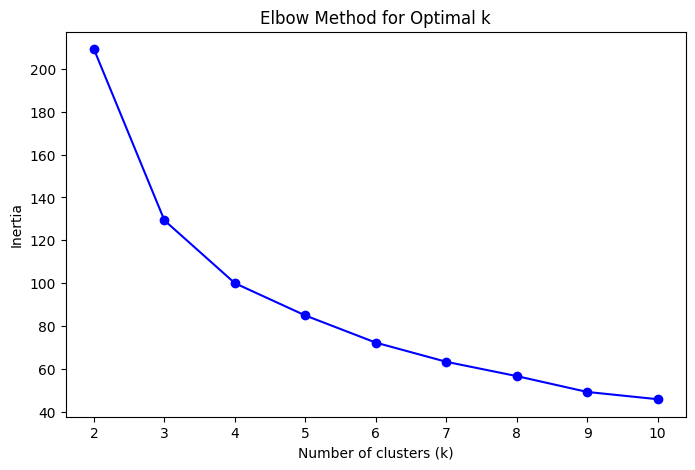

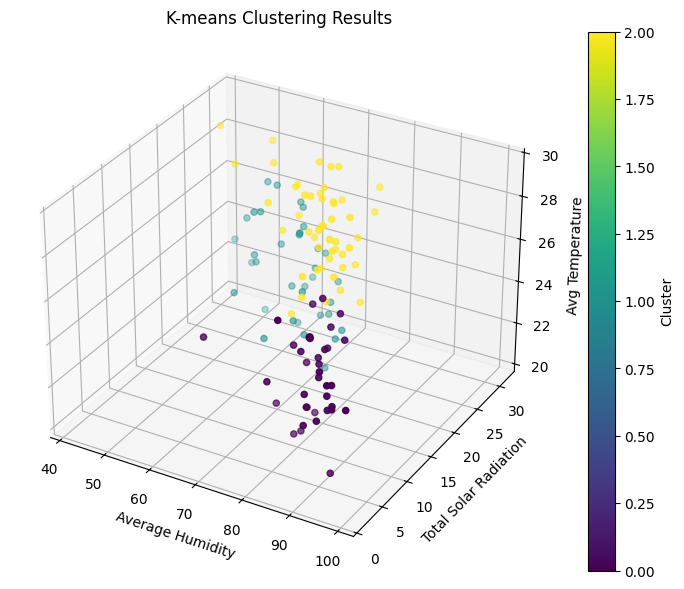

In [85]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 클러스터링 할 데이터 선택
features = merged_df[['AverageHumidity', 'TotalSolarRadiation', 'AvgTemp']]

# 데이터 정리
# StandardScaler를 사용하여 데이터의 평균을 0, 표준 편차를 1로 맞춘다 / 데이터를 같은 크기로 비교하기 위해
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# elbow method를 이용해서 k값을 inertia 값이 급격히 떨어지는 값으로 설정
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=77)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# elbow method 그래프 그리는 코드
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 그래프를 보고 급격하게 떨어지는 3으로 지정
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=77)
clusters = kmeans.fit_predict(scaled_features)

# 계산한 클러스터 행 추가 & 파일로 저장
merged_df['Cluster'] = clusters
merged_df.to_csv('merged_dataset_cluster.csv', index=False)

# 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features['AverageHumidity'], features['TotalSolarRadiation'], features['AvgTemp'],
                     c=merged_df['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('Average Humidity')
ax.set_ylabel('Total Solar Radiation')
ax.set_zlabel('Avg Temperature')
ax.set_title('K-means Clustering Results')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()


# 강수량 데이터 정리

In [87]:
merged_dataset = pd.read_csv("merged_dataset_cluster.csv")
rain_dataset = pd.read_csv("rain.csv")

merged_dataset_extract = merged_dataset[['Date', 'Cluster']]
rain_dataset_extract = rain_dataset[['Date', 'Rainfall']]

# 머지하기
merge_final = pd.merge(merged_dataset_extract, rain_dataset_extract, on='Date', how='left')

# 빈 강수량 값은 0으로 채우기
merge_final['Rainfall'] = merge_final['Rainfall'].fillna(0)

# Rainfall 값에 따라 RainfallCheck 열 추가
merge_final['RainfallCheck'] = merge_final['Rainfall'].apply(lambda x: 1 if x > 0 else 0)

# 수정된 DataFrame을 CSV 파일로 저장
merge_final.to_csv('merge_final.csv', index=False)

print(merge_final)

           Date  Cluster  Rainfall  RainfallCheck
0    2023-06-01        1       0.0              0
1    2023-06-02        0       0.0              0
2    2023-06-03        1       0.0              0
3    2023-06-04        1       0.0              0
4    2023-06-05        1       0.0              0
..          ...      ...       ...            ...
117  2024-07-27        2      33.5              1
118  2024-07-28        2       0.0              0
119  2024-07-29        0       0.0              0
120  2024-07-30        2       0.0              0
121  2024-07-31        2       0.0              0

[122 rows x 4 columns]


# 각 클러스터의 강수 확률을 구해보면

In [90]:
data = pd.read_csv("merge_final.csv")

# Calculate the total number of days and days with rainfall in each cluster
cluster_rainfall_stats = data.groupby('Cluster')['RainfallCheck'].agg(
    total_days='count',
    days_with_rainfall='sum'
)

# Calculate the probability of rainfall in each cluster
cluster_rainfall_stats['probability_of_rainfall'] = (
    cluster_rainfall_stats['days_with_rainfall'] / cluster_rainfall_stats['total_days']
)


print(cluster_rainfall_stats)



         total_days  days_with_rainfall  probability_of_rainfall
Cluster                                                         
0                37                  33                 0.891892
1                36                   4                 0.111111
2                49                  22                 0.448980


# 클러스터를 2개로 나누면

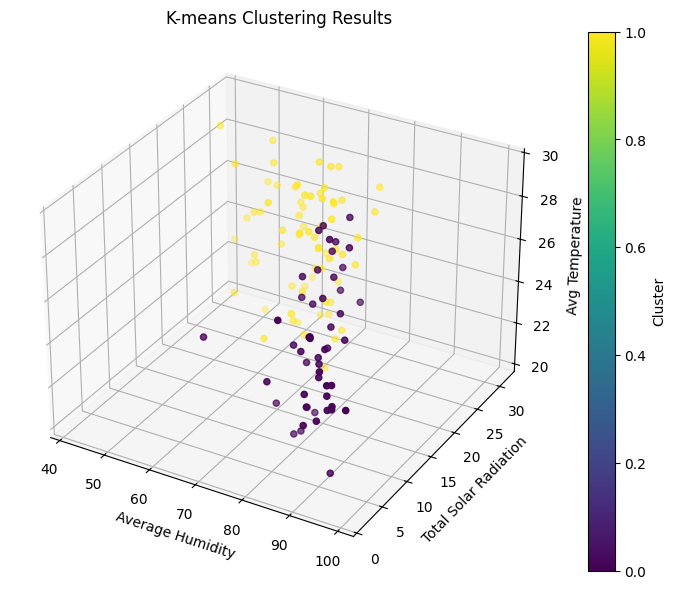

In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 클러스터링 할 데이터 선택
features = merged_df[['AverageHumidity', 'TotalSolarRadiation', 'AvgTemp']]

# 데이터 정리
# StandardScaler를 사용하여 데이터의 평균을 0, 표준 편차를 1로 맞춘다 / 데이터를 같은 크기로 비교하기 위해
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# 그래프를 보고 급격하게 떨어지는 3으로 지정
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=77)
clusters = kmeans.fit_predict(scaled_features)

# 계산한 클러스터 행 추가 & 파일로 저장
merged_df['Cluster'] = clusters
merged_df.to_csv('merged_dataset_cluster2.csv', index=False)

# 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features['AverageHumidity'], features['TotalSolarRadiation'], features['AvgTemp'],
                     c=merged_df['Cluster'], cmap='viridis', marker='o')
ax.set_xlabel('Average Humidity')
ax.set_ylabel('Total Solar Radiation')
ax.set_zlabel('Avg Temperature')
ax.set_title('K-means Clustering Results')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

In [92]:
merged_dataset = pd.read_csv("merged_dataset_cluster2.csv")
rain_dataset = pd.read_csv("rain.csv")

merged_dataset_extract = merged_dataset[['Date', 'Cluster']]
rain_dataset_extract = rain_dataset[['Date', 'Rainfall']]

# 머지하기
merge_final = pd.merge(merged_dataset_extract, rain_dataset_extract, on='Date', how='left')

# 빈 강수량 값은 0으로 채우기
merge_final['Rainfall'] = merge_final['Rainfall'].fillna(0)

# Rainfall 값에 따라 RainfallCheck 열 추가
merge_final['RainfallCheck'] = merge_final['Rainfall'].apply(lambda x: 1 if x > 0 else 0)

# 수정된 DataFrame을 CSV 파일로 저장
merge_final.to_csv('merge_final2.csv', index=False)

print(merge_final)

           Date  Cluster  Rainfall  RainfallCheck
0    2023-06-01        1       0.0              0
1    2023-06-02        0       0.0              0
2    2023-06-03        1       0.0              0
3    2023-06-04        1       0.0              0
4    2023-06-05        1       0.0              0
..          ...      ...       ...            ...
117  2024-07-27        0      33.5              1
118  2024-07-28        1       0.0              0
119  2024-07-29        0       0.0              0
120  2024-07-30        0       0.0              0
121  2024-07-31        1       0.0              0

[122 rows x 4 columns]


In [93]:
data = pd.read_csv("merge_final2.csv")

# Calculate the total number of days and days with rainfall in each cluster
cluster_rainfall_stats = data.groupby('Cluster')['RainfallCheck'].agg(
    total_days='count',
    days_with_rainfall='sum'
)

# Calculate the probability of rainfall in each cluster
cluster_rainfall_stats['probability_of_rainfall'] = (
    cluster_rainfall_stats['days_with_rainfall'] / cluster_rainfall_stats['total_days']
)


print(cluster_rainfall_stats)



         total_days  days_with_rainfall  probability_of_rainfall
Cluster                                                         
0                51                  45                 0.882353
1                71                  14                 0.197183
